In [7]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np


RANDOM_SEED = 58583389
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")


# Section 2.1 Point Estimators

C:\Users\issam_biodcm6\AppData\Local\Temp\ipykernel_16932\605632481.py:71: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


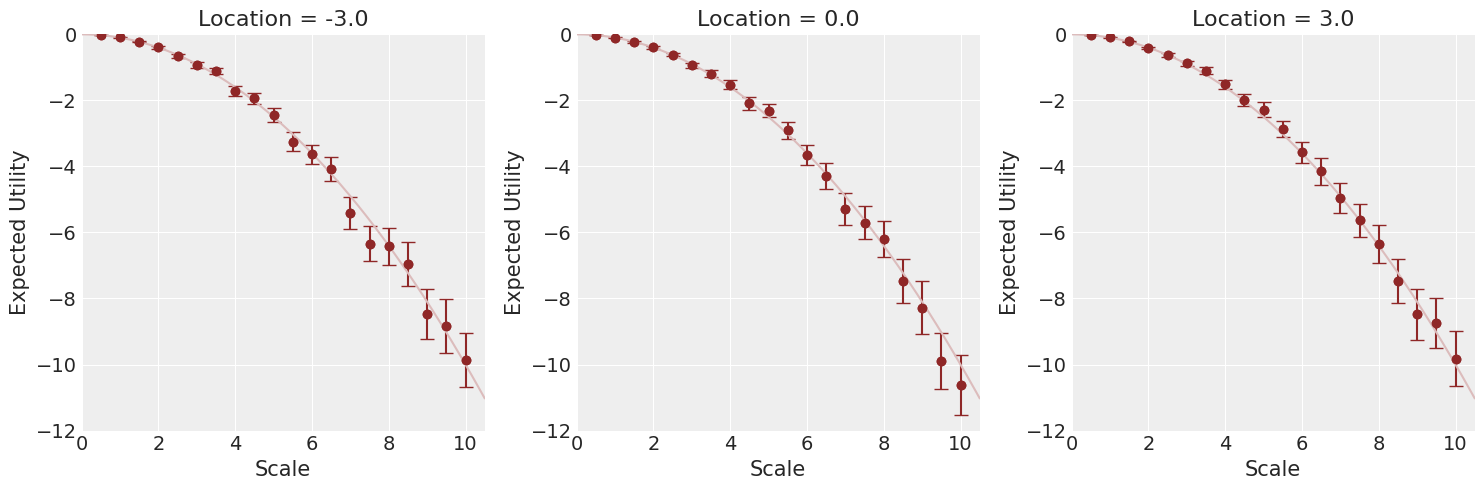

In [8]:
# Define colors
c_light = "#DCBCBC"
c_dark = "#8F2727"

# Welford's method for computing mean and variance
def welford_summary(x):
    mean = 0
    M2 = 0
    for n, xi in enumerate(x):
        delta = xi - mean
        mean += delta / (n + 1)
        M2 += delta * (xi - mean)
    variance = M2 / (len(x) - 1)
    return mean, variance

# Compute Monte Carlo statistics
def compute_mc_stats(x):
    mean, variance = welford_summary(x)
    return mean, np.sqrt(variance / len(x))

# Parameters
N_obs = 10
N_simu = 1000

N_mu = 3
mus = np.linspace(-3, 3, N_mu)

N_sigma = 20
sigmas = np.linspace(0.5, 10, N_sigma)

# Squared error utility function
def se_util(x_hat, x):
    return -(x_hat - x)**2

# Mean estimator
def mu_hat(y):
    return np.mean(y)

# Plotting
plt.figure(figsize=(15, 5))

for m in range(N_mu):
    exp_utils = np.zeros(N_sigma)
    deltas = np.zeros(N_sigma)
    
    for s in range(N_sigma):
        sample_util = np.zeros(N_simu)
        
        for n in range(N_simu):
            simu_data = np.random.normal(mus[m], sigmas[s], N_obs)
            location_estimator = mu_hat(simu_data)
            sample_util[n] = se_util(location_estimator, mus[m])
        
        mc_stats = compute_mc_stats(sample_util)
        exp_utils[s] = mc_stats[0]
        deltas[s] = 2 * mc_stats[1]
    
    plt.subplot(1, 3, m + 1)
    plt.plot(sigmas, exp_utils, 'o', color=c_dark)
    plt.title(f"Location = {mus[m]}")
    plt.xlim(0, 10.5)
    plt.xlabel("Scale")
    plt.ylim(-12, 0)
    plt.ylabel("Expected Utility")
    
    plt.errorbar(sigmas, exp_utils, yerr=deltas, fmt='o', color=c_dark, capsize=5)
    
    xs = np.linspace(0, 10.5, 1000)
    plt.plot(xs, -xs**2 / N_obs, color=c_light)

plt.tight_layout()
plt.show()


C:\Users\issam_biodcm6\AppData\Local\Temp\ipykernel_16932\2501079615.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


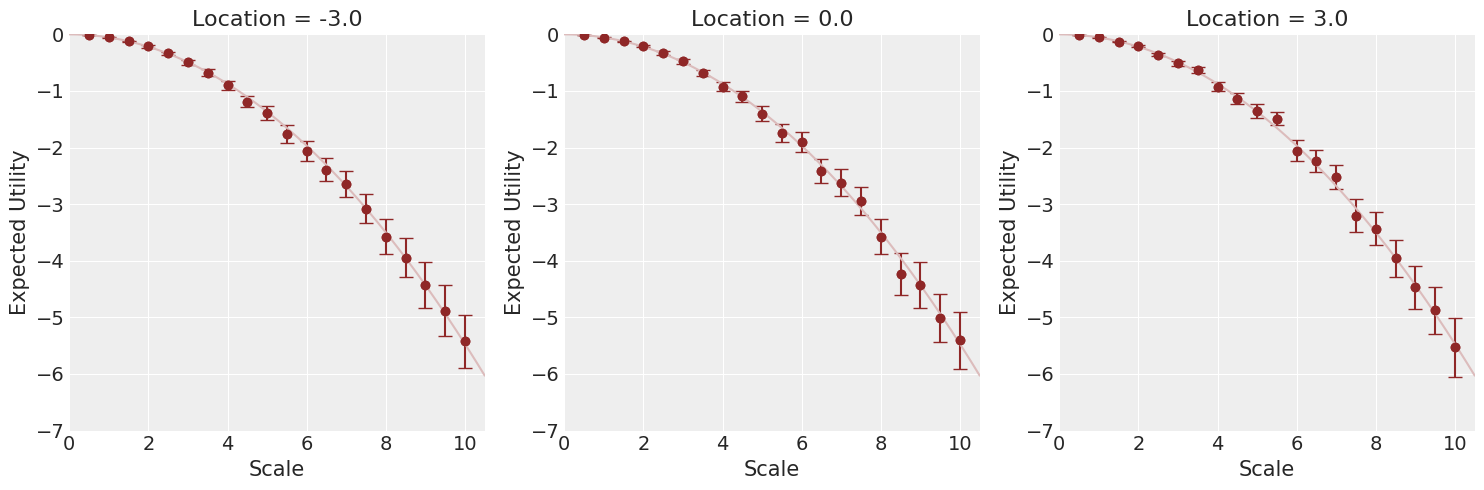

In [9]:
# Import for gamma function 
from scipy.special import gamma

# Scale estimator
def sigma_hat(y):
    return np.std(y, ddof=1)

# Plotting
plt.figure(figsize=(15, 5))

for m in range(N_mu):
    exp_utils = np.zeros(N_sigma)
    deltas = np.zeros(N_sigma)
    
    for s in range(N_sigma):
        sample_util = np.zeros(N_simu)
        
        for n in range(N_simu):
            simu_data = np.random.normal(mus[m], sigmas[s], N_obs)
            scale_estimator = sigma_hat(simu_data)
            sample_util[n] = se_util(scale_estimator, sigmas[s])
        
        mc_stats = compute_mc_stats(sample_util)
        exp_utils[s] = mc_stats[0]
        deltas[s] = 2 * mc_stats[1]
    
    plt.subplot(1, 3, m + 1)
    plt.plot(sigmas, exp_utils, 'o', color=c_dark)
    plt.title(f"Location = {mus[m]}")
    plt.xlim(0, 10.5)
    plt.xlabel("Scale")
    plt.ylim(-7, 0)
    plt.ylabel("Expected Utility")
    
    plt.errorbar(sigmas, exp_utils, yerr=deltas, fmt='o', color=c_dark, capsize=5)
    
    C_N = 2 * (1 - np.sqrt(2 / (N_obs - 1)) * gamma(0.5 * N_obs) / gamma(0.5 * (N_obs - 1)))
    xs = np.linspace(0, 10.5, 1000)
    plt.plot(xs, -C_N * xs**2, color=c_light)

plt.tight_layout()
plt.show()